# Import Packages

In [1]:
from astropy.time import Time
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modules.Utils.kpf_parse import get_datecode
from kpfpipe.models.level0 import KPF0
%matplotlib inline

# Define Directories and Filenames
One needs to have the L0 file KP.20221112.26598.92_L1.fits in the data/ directory of the folder from which this notebook is running.  This file can be downloaded from Jump or shrek.caltech.edu.  One can also modify the code below to work with other files or paths.

In [2]:
data_dir = '/data/'
ObsID = 'KP.20240422.28832.89' # on-sky spectrum of TOI-1823 (PI: Howard data)
L1_file = data_dir + 'L1/' + get_datecode(ObsID) + '/' + ObsID + '_L1.fits'

# Open File and Show Information
Note that there are exensions for:
  * Header keywords (PRIMARY) - all of the header keywords from the corrssponding L0 file plus ones created during DRP processin that produced the L1
  * The receipt detailing the DRP operations that produced this L1 file (RECEIPT)
  * A list of configuration variables that were set when the DRP produced this L1 file (CONFIG).  This feature is not yet implemented.
  * Telemetry of the KPF instrument from the L0 file (TELEMETRY)
  * Extracted spectra from the green and red CCDs.  There are 35 spectral orders on the green CCD (445-600 nm) and 32 spectral orders on the red CCD (600-870 nm).  Each order has five orderlers derived from the three KPF fibers (SKY, SCI, CAL).  Spatially, the orderlets are arrayed {SKY, SCI1, SCI2, SCI3, CAL} from bottom (lower cross dispersion wavelengths) to top on the CCDs.  The extracted spectra are stored in units of photoelectrons, which is corrected for CCD gain and obeys Poisson statistics.  The extracted sectra are organized as one-dimensional flux arrays of length 4080 for each of the 35 or 32 orders:
      * three orderlets from the SCI fiber (GREEN_SCI_FLUX1, GREEN_SCI_FLUX2, GREEN_SCI_FLUX3, RED_SCI_FLUX1, RED_SCI_FLUX2, RED_SCI_FLUX3), 
      * one SKY fiber orderlet (GREEN_SKY_FLUX, RED_SKY_FLUX)
      * one CAL fiber orderlet (GREEN_CAL_FLUX, RED_CAL_FLUX) per spectral order.  
  * Each extracted pixel has a corresponding variance (GREEN_SCI_VAR1, GREEN_SCI_VAR2, GREEN_SCI_VAR3, GREEN_SKY_VAR3, GREEN_CAL_VAR3, RED_SCI_VAR1, RED_SCI_VAR2, RED_SCI_VAR3, RED_SKY_VAR3, RED_CAL_VAR3) and wavelength (GREEN_SCI_WAV1, GREEN_SCI_WAV2, GREEN_SCI_WAV3, GREEN_SKY_WAV3, GREEN_CAL_WAV3, RED_SCI_WAV1, RED_SCI_WAV2, RED_SCI_WAV3, RED_SKY_VAR3, RED_CAL_VAR3).
  * Telluric models of the green and red spectra (GREEN_TELLURIC and RED_TELLURIC), which are currently not populated.
  * Sky models of the green and red spectra (GREEN_SKY and RED_SKY), which are currently not populated.
  * Extracted spectra of the science and sky traces (seven orders each) from the Ca H&K spectometer (CA_HK_SCI and CA_HK_SKY)
  * Wavelength solutions from the Ca H&K spectra (CA_HK_WAV and CA_HK_WAV)

In [3]:
L1 = KPF0.from_fits(L1_file, data_type='KPF')
L1.info()

File name: KP.20240422.28832.89_L1.fits
|Header Name          |# Cards              
|PRIMARY              |                 581 
|RECEIPT              |                  29 
|CONFIG               |                  13 
|GREEN_AMP1           |                  18 
|GREEN_AMP2           |                  18 
|GREEN_CCD            |                   3 
|GREEN_VAR            |                   3 
|RED_AMP1             |                  18 
|RED_AMP2             |                  18 
|RED_CCD              |                   0 
|RED_VAR              |                   0 
|CA_HK                |                  16 
|EXPMETER_SCI         |                   0 
|EXPMETER_SKY         |                   0 
|GUIDECAM             |                   0 
|TELEMETRY            |                  26 
|SOLAR_IRRADIANCE     |                   0 
|GREEN_TELLURIC       |                   9 
|GREEN_SKY            |                   9 
|RED_TELLURIC         |                   9 
|RED_SKY       

# Receipt
The receipt is a FITS binary table that is converted below to a Pandas dataframe.  The receipt contains a time-ordered list of DRP modules and associated parameteres that were used to produce the L1 file as well as other related information

In [4]:
df_receipt = Table.read(L1_file, format='fits',hdu='RECEIPT').to_pandas()
num_columns = ['Module_Level']
for column in df_receipt:
    df_receipt[column] = df_receipt[column].str.decode('utf-8')
    if column in num_columns:
        df_receipt[column] = pd.to_numeric(df_receipt[column], downcast="float")
    else:
        df_receipt[column] = df_receipt[column].astype(str)
df_receipt

,Time,Code_Release,Branch_Name,Commit_Hash,Chip,Module_Name,Module_Level,Module_Path,Module_Param,Status
0,2024-04-22T08:18:32.435194,v2.6.1,master,85b3008393fd678380a3a844898b2969929efc7f,all,SpectralExtraction,1.0,modules.spectral_extraction.src.spectral_extra...,orderlets=GREEN_SKY_FLUX GREEN_SCI_FLUX1 GREEN...,PASS
1,2024-04-22T08:22:31.818630,v2.6.1,master,85b3008393fd678380a3a844898b2969929efc7f,all,SpectralExtraction,1.0,modules.spectral_extraction.src.spectral_extra...,orderlets=RED_SKY_FLUX RED_SCI_FLUX1 RED_SCI_F...,PASS
2,2024-04-22T08:22:37.033083,v2.6.1,master,85b3008393fd678380a3a844898b2969929efc7f,all,from_fits,1.0,kpfpipe.models.level1,md5_sum=448cb5b1f8ddc2d6f22845f122cd550a,PASS
3,2024-04-22T08:22:39.596881,v2.6.1,master,85b3008393fd678380a3a844898b2969929efc7f,all,ExtCopy,1.0,modules.Utils.data_handler,extension copy from kpf_20230531_master_WLS_au...,PASS
4,2024-04-22T08:22:40.779304,v2.6.1,master,85b3008393fd678380a3a844898b2969929efc7f,all,ExtCopy,1.0,modules.Utils.data_handler,extension copy from kpf_20230531_master_WLS_au...,PASS
5,2024-04-22T08:22:41.916799,v2.6.1,master,85b3008393fd678380a3a844898b2969929efc7f,all,ExtCopy,1.0,modules.Utils.data_handler,extension copy from kpf_20230531_master_WLS_au...,PASS
6,2024-04-22T08:22:43.097687,v2.6.1,master,85b3008393fd678380a3a844898b2969929efc7f,all,ExtCopy,1.0,modules.Utils.data_handler,extension copy from kpf_20230531_master_WLS_au...,PASS
7,2024-04-22T08:22:44.278306,v2.6.1,master,85b3008393fd678380a3a844898b2969929efc7f,all,ExtCopy,1.0,modules.Utils.data_handler,extension copy from kpf_20230531_master_WLS_au...,PASS
8,2024-04-22T08:22:46.859432,v2.6.1,master,85b3008393fd678380a3a844898b2969929efc7f,all,ExtCopy,1.0,modules.Utils.data_handler,extension copy from kpf_20230531_master_WLS_au...,PASS
9,2024-04-22T08:22:48.033547,v2.6.1,master,85b3008393fd678380a3a844898b2969929efc7f,all,ExtCopy,1.0,modules.Utils.data_handler,extension copy from kpf_20230531_master_WLS_au...,PASS


# Extracted Spectra
We will start by plotting spectra from the SCI2 trace on both CCDs

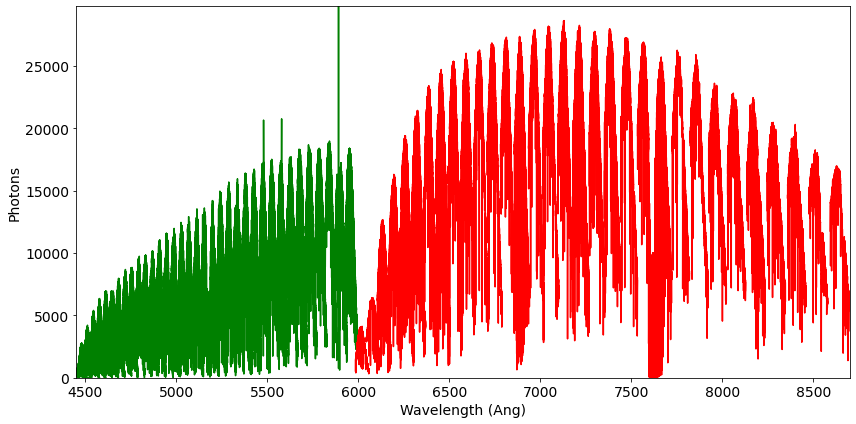

In [5]:
GREEN_SCI_WAVE1 = np.array(L1['GREEN_SCI_WAVE1'].data)
GREEN_SCI_WAVE2 = np.array(L1['GREEN_SCI_WAVE2'].data)
GREEN_SCI_WAVE3 = np.array(L1['GREEN_SCI_WAVE3'].data)
GREEN_SKY_WAVE  = np.array(L1['GREEN_SKY_WAVE'].data)
GREEN_SCI_FLUX1 = np.array(L1['GREEN_SCI_FLUX1'].data)
GREEN_SCI_FLUX2 = np.array(L1['GREEN_SCI_FLUX2'].data)
GREEN_SCI_FLUX3 = np.array(L1['GREEN_SCI_FLUX3'].data)
GREEN_SKY_VAR   = np.array(L1['GREEN_SKY_VAR'].data)
GREEN_SCI_VAR1  = np.array(L1['GREEN_SCI_VAR1'].data)
GREEN_SCI_VAR2  = np.array(L1['GREEN_SCI_VAR2'].data)
GREEN_SCI_VAR3  = np.array(L1['GREEN_SCI_VAR3'].data)
GREEN_SKY_VAR   = np.array(L1['GREEN_SKY_VAR'].data)
RED_SCI_WAVE1   = np.array(L1['RED_SCI_WAVE1'].data)
RED_SCI_WAVE2   = np.array(L1['RED_SCI_WAVE2'].data)
RED_SCI_WAVE3   = np.array(L1['RED_SCI_WAVE3'].data)
RED_SKY_WAVE    = np.array(L1['RED_SKY_WAVE'].data)
RED_SCI_FLUX1   = np.array(L1['RED_SCI_FLUX1'].data)
RED_SCI_FLUX2   = np.array(L1['RED_SCI_FLUX2'].data)
RED_SCI_FLUX3   = np.array(L1['RED_SCI_FLUX3'].data)
RED_SKY_FLUX    = np.array(L1['RED_SKY_FLUX'].data)
RED_SKY_VAR     = np.array(L1['RED_SKY_VAR'].data)
RED_SCI_VAR1    = np.array(L1['RED_SCI_VAR1'].data)
RED_SCI_VAR2    = np.array(L1['RED_SCI_VAR2'].data)
RED_SCI_VAR3    = np.array(L1['RED_SCI_VAR3'].data)
RED_SKY_VAR     = np.array(L1['RED_SKY_VAR'].data)
plt.figure(figsize=(12, 6), tight_layout=True)
for o in range(35):
    plt.plot(GREEN_SCI_WAVE2[o,:], GREEN_SCI_FLUX2[o,:], color='g')
for o in range(32):
    plt.plot(RED_SCI_WAVE2[o,:], RED_SCI_FLUX2[o,:], color='r')
plt.xlabel('Wavelength (Ang)', fontsize=14)
plt.ylabel('Photons', fontsize=14)
plt.xlim(4450,8700)
plt.ylim(0,np.percentile(RED_SCI_FLUX2[:,:],99)*1.1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Now we will plot just order 16 on the red CCD for the SCI2 trace.

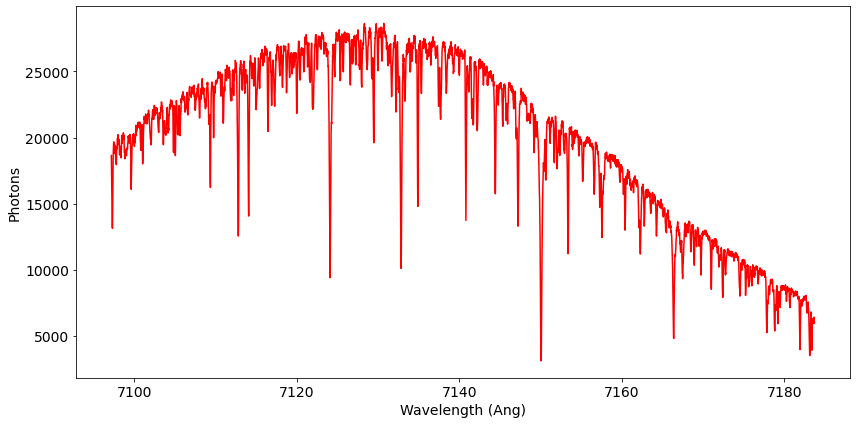

In [6]:
plt.figure(figsize=(12, 6), tight_layout=True)
o = 16
plt.plot(RED_SCI_WAVE2[o,:], RED_SCI_FLUX2[o,:], color='r')
plt.xlabel('Wavelength (Ang)', fontsize=14)
plt.ylabel('Photons', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The SCI1, SCI2, and SCI3 have different amounts of flux because they come from different parts of the sliced octagonal SCI fiber.

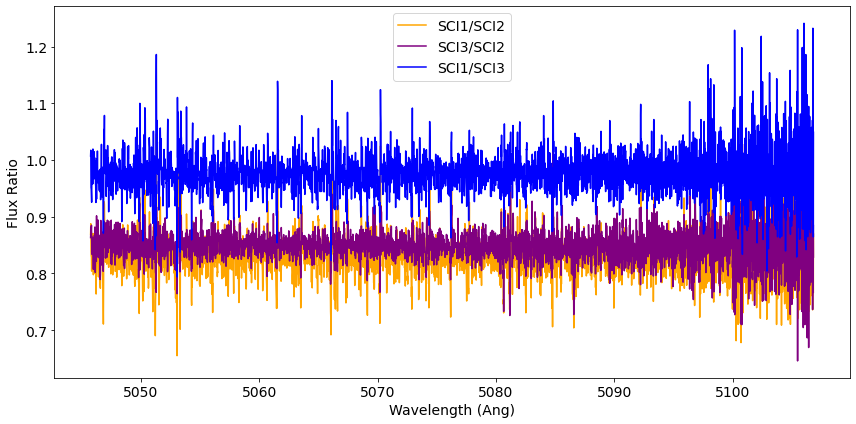

In [7]:
plt.figure(figsize=(12, 6), tight_layout=True)
o = 16
plt.plot(GREEN_SCI_WAVE2[o,:], GREEN_SCI_FLUX1[o,:]/GREEN_SCI_FLUX2[o,:], color='orange')
plt.plot(GREEN_SCI_WAVE2[o,:], GREEN_SCI_FLUX3[o,:]/GREEN_SCI_FLUX2[o,:], color='purple')
plt.plot(GREEN_SCI_WAVE2[o,:], GREEN_SCI_FLUX1[o,:]/GREEN_SCI_FLUX3[o,:], color='blue')
plt.legend(['SCI1/SCI2', 'SCI3/SCI2', 'SCI1/SCI3'], fontsize=14, loc='best') 
plt.xlabel('Wavelength (Ang)', fontsize=14)
plt.ylabel('Flux Ratio', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

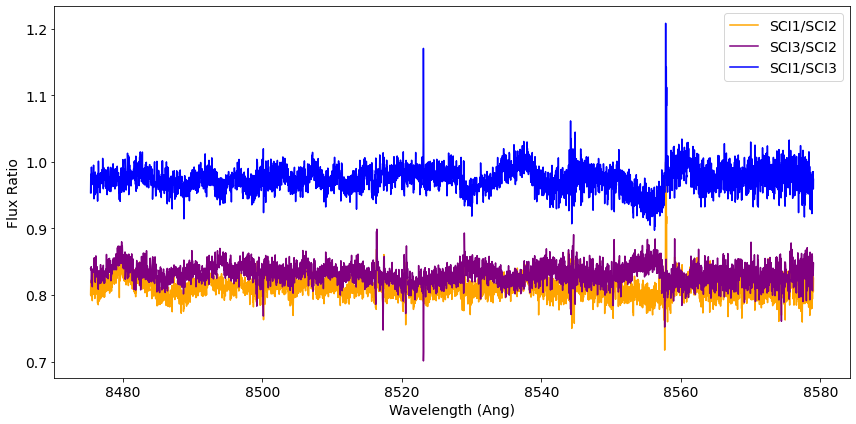

In [8]:
plt.figure(figsize=(12, 6), tight_layout=True)
o = 30
plt.plot(RED_SCI_WAVE2[o,:], RED_SCI_FLUX1[o,:]/RED_SCI_FLUX2[o,:], color='orange')
plt.plot(RED_SCI_WAVE2[o,:], RED_SCI_FLUX3[o,:]/RED_SCI_FLUX2[o,:], color='purple')
plt.plot(RED_SCI_WAVE2[o,:], RED_SCI_FLUX1[o,:]/RED_SCI_FLUX3[o,:], color='blue')
plt.legend(['SCI1/SCI2', 'SCI3/SCI2', 'SCI1/SCI3'], fontsize=14, loc='best') 
plt.xlabel('Wavelength (Ang)', fontsize=14)
plt.ylabel('Flux Ratio', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The wavelength solutions for the different SCI orderlets are similar, but not identical.

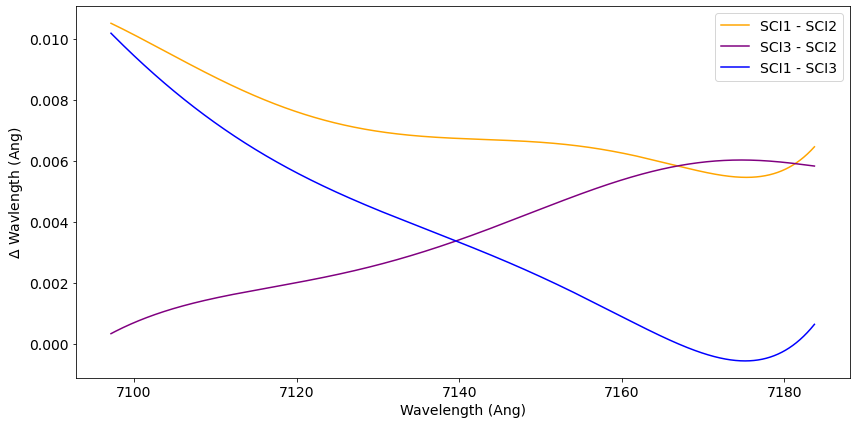

In [9]:
plt.figure(figsize=(12, 6), tight_layout=True)
o = 16
plt.plot(RED_SCI_WAVE2[o,:], RED_SCI_WAVE1[o,:] - RED_SCI_WAVE2[o,:], color='orange')
plt.plot(RED_SCI_WAVE2[o,:], RED_SCI_WAVE3[o,:] - RED_SCI_WAVE2[o,:], color='purple')
plt.plot(RED_SCI_WAVE2[o,:], RED_SCI_WAVE1[o,:] - RED_SCI_WAVE3[o,:], color='blue')
plt.legend(['SCI1 - SCI2', 'SCI3 - SCI2', 'SCI1 - SCI3'], fontsize=14, loc='best') 
plt.xlabel('Wavelength (Ang)', fontsize=14)
plt.ylabel(r'$\Delta$ Wavlength (Ang)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The size of a pixel in Angstroms is:

In [10]:
RED_SCI_WAVE1[o,1999] - RED_SCI_WAVE1[o,2000] 

0.02114812245235953

Zooming out and plotting the wavelength difference for all orders.

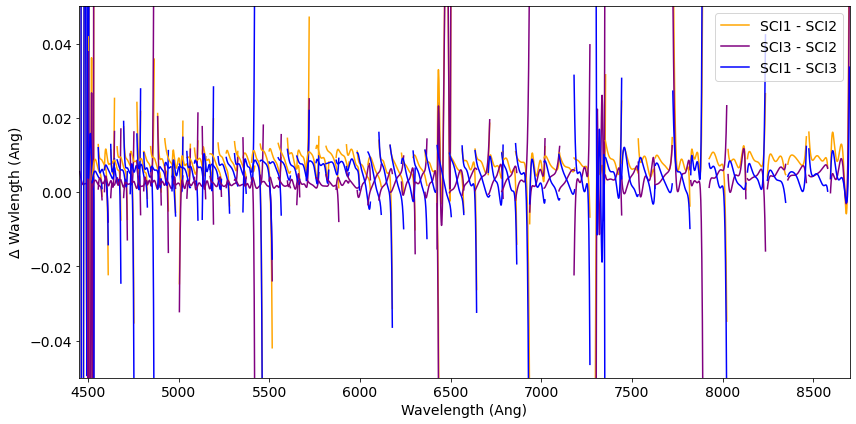

In [11]:
plt.figure(figsize=(12, 6), tight_layout=True)
for o in range(35):
    plt.plot(GREEN_SCI_WAVE2[o,:], GREEN_SCI_WAVE1[o,:] - GREEN_SCI_WAVE2[o,:], color='orange')
    plt.plot(GREEN_SCI_WAVE2[o,:], GREEN_SCI_WAVE3[o,:] - GREEN_SCI_WAVE2[o,:], color='purple')
    plt.plot(GREEN_SCI_WAVE2[o,:], GREEN_SCI_WAVE1[o,:] - GREEN_SCI_WAVE3[o,:], color='blue')
for o in range(32):
    plt.plot(RED_SCI_WAVE2[o,:], RED_SCI_WAVE1[o,:] - RED_SCI_WAVE2[o,:], color='orange')
    plt.plot(RED_SCI_WAVE2[o,:], RED_SCI_WAVE3[o,:] - RED_SCI_WAVE2[o,:], color='purple')
    plt.plot(RED_SCI_WAVE2[o,:], RED_SCI_WAVE1[o,:] - RED_SCI_WAVE3[o,:], color='blue')
plt.legend(['SCI1 - SCI2', 'SCI3 - SCI2', 'SCI1 - SCI3'], fontsize=14, loc='best') 
plt.xlabel('Wavelength (Ang)', fontsize=14)
plt.ylabel(r'$\Delta$ Wavlength (Ang)', fontsize=14)
plt.xlim(4450,8700)
plt.ylim(-0.05,0.05)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

We can also plot the sky spectrum, which in the current case looks like mostly scattered light since there are no visible spectral lines.

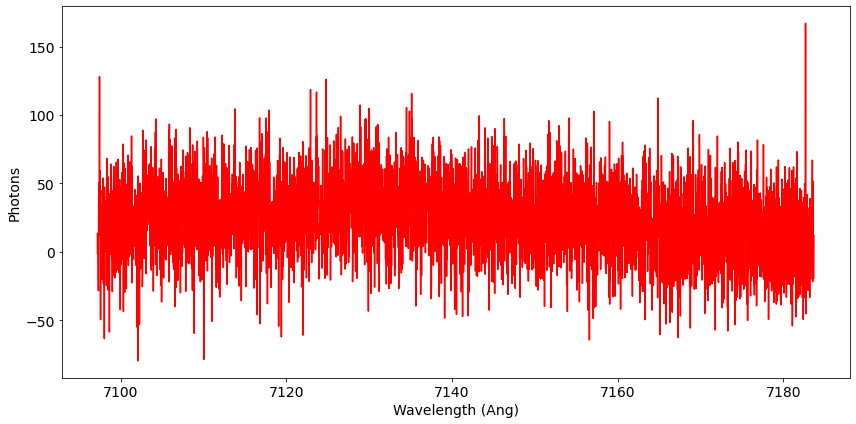

In [12]:
plt.figure(figsize=(12, 6), tight_layout=True)
o = 16
plt.plot(RED_SKY_WAVE[o,:], RED_SKY_FLUX[o,:], color='r')
plt.xlabel('Wavelength (Ang)', fontsize=14)
plt.ylabel('Photons', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Variance allows us to compute the SNR of the spectrum.  At the moment, only Poisson noise is included in the variance.  Read noise and dark current are not.  Here we will add the flux (and variance) from the three SCI orderlets.  Let's also plot the median SNR per order.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


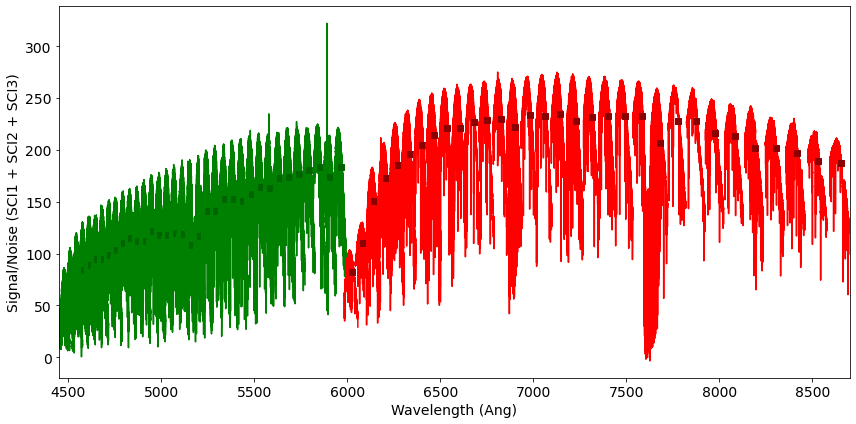

In [13]:
GREEN_SCI_FLUX = GREEN_SCI_FLUX1 + GREEN_SCI_FLUX2 + GREEN_SCI_FLUX3
RED_SCI_FLUX   = RED_SCI_FLUX1   + RED_SCI_FLUX2   + RED_SCI_FLUX3
GREEN_SCI_VAR  = GREEN_SCI_VAR1  + GREEN_SCI_VAR2  + GREEN_SCI_VAR3
RED_SCI_VAR    = RED_SCI_VAR1    + RED_SCI_VAR2    + RED_SCI_VAR3

plt.figure(figsize=(12, 6), tight_layout=True)
for o in range(35):
    plt.plot(GREEN_SCI_WAVE2[o,:], GREEN_SCI_FLUX[o,:]/np.sqrt(GREEN_SCI_VAR[o,:]), color='g')
    plt.plot(GREEN_SCI_WAVE2[o,2040], np.median(GREEN_SCI_FLUX[o,:]/np.sqrt(GREEN_SCI_VAR[o,:])), marker="s", color='darkgreen')
for o in range(32):
    plt.plot(RED_SCI_WAVE2[o,:], RED_SCI_FLUX[o,:]/np.sqrt(RED_SCI_VAR[o,:]), color='r')
    plt.plot(RED_SCI_WAVE2[o,2040], np.median(RED_SCI_FLUX[o,:]/np.sqrt(RED_SCI_VAR[o,:])), marker="s", color='darkred')
plt.xlabel('Wavelength (Ang)', fontsize=14)
plt.ylabel('Signal/Noise (SCI1 + SCI2 + SCI3)', fontsize=14)
plt.xlim(4450,8700)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()